In [1]:
import kaggle_functions as kaggle
import tensorflow.keras as keras
import keras_tuner as kt
import matplotlib.pyplot as plt

In [ ]:
complete_train_dataset, train_dataset, test_dataset= kaggle.load_train_as_dataset()
x_test_real = kaggle.load_test_set()

### Simple NN 
This type of network fails to generalize, giving only about 30% accuracy on validation/test sets.

In [ ]:
# Create simple NN
model = keras.models.Sequential([
    keras.layers.InputLayer((96,96,1)),
    # Used to reduce number of parameters (was too high to train)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Not a convnet, only a flat network
    keras.layers.Flatten(),
    # Standard ReLU activation, L2 regularizer to prevent overfitting
    keras.layers.Dense(
        256, activation='relu'),
    # Dropout to prevent overfitting
    keras.layers.Dropout(0.3),
    keras.layers.Dense(
        256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(11)
])
# model.summary()

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# Early stopping
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30),
]

# Fit model
history = model.fit(
    train_dataset.batch(32), 
    validation_data=test_dataset.batch(32), 
    epochs=1, callbacks=callbacks, verbose=1)

Fake test set:
Loss: 2.224	Accuracy: 0.247


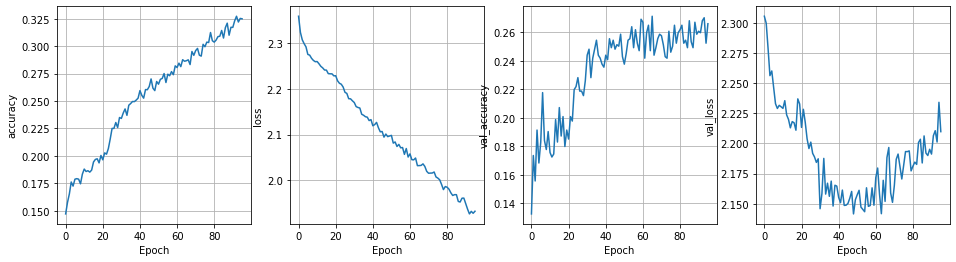

In [13]:
def plot_model_history(history, labels=[]):
    label_count = len(labels)
    if label_count > 0:
        fig, axes = plt.subplots(1, label_count, figsize=(4*label_count, 4))
        for axis, label in zip(axes, labels):
            axis.plot(history.history[label], label=label)
            axis.set_xlabel('Epoch')
            axis.set_ylabel(label)
            axis.grid(True)

plot_model_history(history, ['accuracy', 'loss', 'val_accuracy', 'val_loss'])